In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
warnings.simplefilter('ignore')

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Method 1 for creating a plot.

First create a **`figure`** object and then use the figure object to create **AxesSubplot** objects.  Use the subplot objects to draw plots.


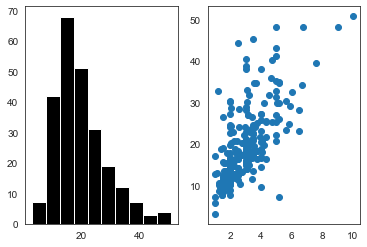

In [65]:
fig = plt.figure() 
ax1 = fig.add_subplot(1, 2, 1) #(rows, columns, position)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(tips['total_bill'], color='k')
ax2.scatter(tips['tip'], tips['total_bill'])

# Method 2 - a convenient shortcut (same as above)

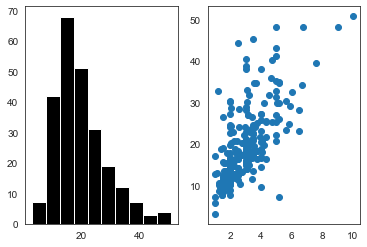

In [52]:
fig2, axes2 = plt.subplots(1, 2)  #convenient shortcut for code in previous cell
axes2[0].hist(tips['total_bill'], color='k')
axes2[1].scatter(tips['tip'], tips['total_bill'])

Weblink for color choices:  https://matplotlib.org/3.1.0/gallery/color/named_colors.html

## Plot using Pyplot.plot method with axesSubplots

In [ ]:
sns.set_style("darkgrid")
hist, ax = plt.subplots()
ax.hist(tips['total_bill'], color = 'tab:blue', edgecolor='k')
ax.set_title('Distribution of the Total Bill')
ax.set_ylabel('dollars ($)')
ax.set_xlabel('frequency')
ax.set_xlim([0,60])
ax.set_ylim([0,100])
#ax.set_xticks([10,20,30,40,50])
#ax.set_xticklabels(['Zero', 'Ten','Twenty','Thirty','Forty','Fifty'])
ax.legend(loc='best') # not needed for this graph
plt.show()
#hist.savefig('tipsfig.png', dpi=400, bbox_inches='tight')

## Seaborn version 0.9 methods for plotting
- sns.distplot() is a distribution plot (histogram)
- sns.countplot() is a bar plot
- sns.regplot() or lmplot() with fit_reg=False is a scatter plot
- sns.boxplot(x,y,data) is a boxplot
- sns.barplot(x,y,data) 
- sns.catplot(x,y,hue,kind='swarm',data) is a beeswarm plot for categorical variables

https://seaborn.pydata.org/introduction.html

Seaborn Themes:  https://python-graph-gallery.com/104-seaborn-themes/

check your installed version of seaborn with ```sns.__version__```

## Set your Seaborn theme

There are four styles:  
  - sns.set_style('stylename')
- darkgrid
- whitegrid
- dark
- white

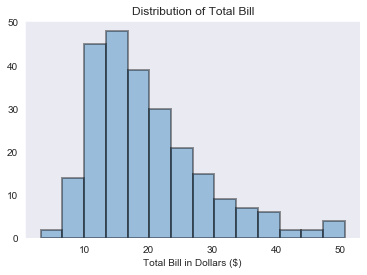

In [69]:
sns.set_style('dark')
fig, axes = plt.subplots()
axes = sns.distplot(tips['total_bill'], kde=False, 
                    hist_kws=dict(edgecolor="k", linewidth=2), color='tab:blue')
axes.set_title('Distribution of Total Bill')
axes.set_xlabel('Total Bill in Dollars ($)')
plt.show()

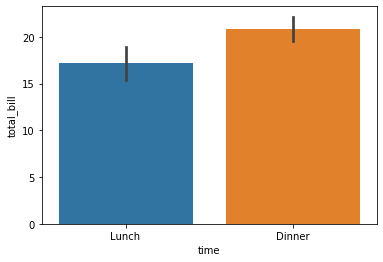

In [7]:
fig, ax = plt.subplots()
ax = sns.barplot(x='time', y = 'total_bill', data = tips)
plt.show()

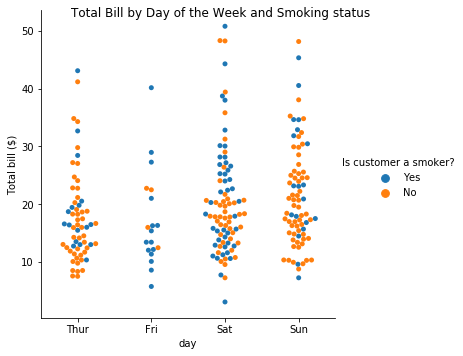

In [28]:
g = sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", legend=False,data=tips)
g.add_legend(title="Is customer a smoker?")
g.fig.suptitle('Total Bill by Day of the Week and Smoking status')
g.set_axis_labels("day", "Total bill ($)")

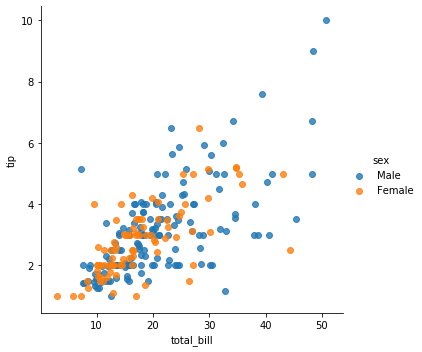

In [30]:
g = sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', fit_reg=False)
plt.show()

## Seaborn Boxplot
https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Seaborn plots (`sns.xxxplot()`) return axes objects, not figure objects so you can control them with `plt.attribute`

Text(0.5, 1.0, 'Total Bill Cost in ($) by Day')

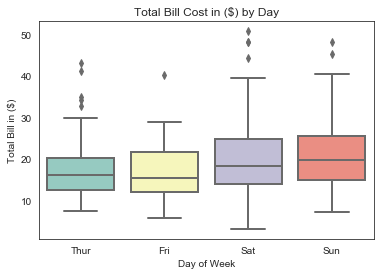

In [50]:
g = sns.boxplot(x = 'day', y = 'total_bill', data = tips, linewidth = 2.0, palette = "Set3")
#g.set_title('Total Bill Cost in ($) by Day')
#g.set(xlabel = 'Day of Week', ylabel = 'Total Bill in ($)')
plt.xlabel('Day of Week')
plt.ylabel('Total Bill in ($)')
plt.title('Total Bill Cost in ($) by Day')

## Matplotlib plotting methods

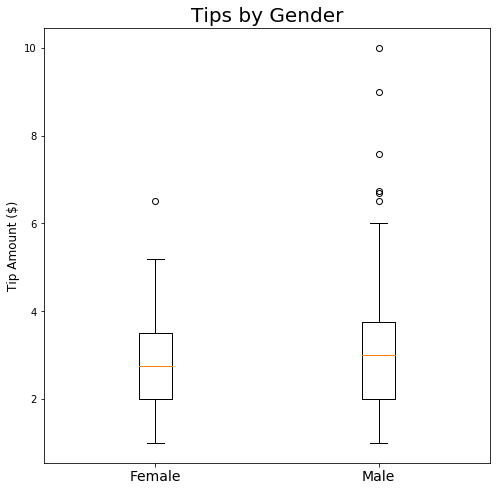

In [34]:
fig, ax3 = plt.subplots(1,1, figsize=(8,8))
ax3.boxplot([tips[tips['sex'] == 'Female']['tip'],
           tips[tips['sex'] == 'Male']['tip']])
ax3.set_title('Tips by Gender', fontsize = 20)
#ax3.set_xlabel('Gender', fontsize = 12)
ax3.set_ylabel('Tip Amount ($)', fontsize = 12)
ax3.set_xticklabels(['Female','Male'], fontsize = 14)
fig.show()

In [ ]:
tips.day.value_counts()
tips.groupby('day')['tip'].count()

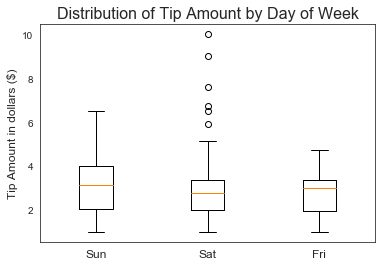

In [35]:
sns.set_style("white")
fig3, ax4 = plt.subplots()
ax4.boxplot([tips[tips['day']=='Sun']['tip'],
           tips[tips['day']=='Sat']['tip'],
           tips[tips['day']=='Fri']['tip']])
ax4.set_xticklabels(['Sun','Sat','Fri'], fontsize=12)
ax4.set_ylabel('Tip Amount in dollars ($)', fontsize=12)
ax4.set_title('Distribution of Tip Amount by Day of Week', fontsize=16)
fig3.show()

In [31]:
def recode_sex(sex):
    return 0 if sex == 'Female' else 1

In [32]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

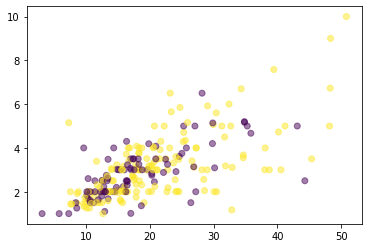

In [33]:
fig, ax = plt.subplots()
ax.scatter(tips['total_bill'], tips['tip'], c = tips['sex_color'], alpha = 0.5)